In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from fase.fileio import Table
%matplotlib inline
import matplotlib 
matplotlib.rc('xtick', labelsize=10) 
matplotlib.rc('ytick', labelsize=10)
matplotlib.rcParams.update({'font.size': 20})

In [2]:
def EDGE(x,y,x_min=-26.,x_max=-15.,x_bin_size=0.1,y_min=0.45,y_max=2.2,y_bin_size=0.15,threashold =0.15):
    '''It returns two arrays containing the x and y of the edge'''
    y_Nbins = int((y_max - y_min) / y_bin_size)
    x_Nbins = int((x_max - x_min) / x_bin_size)
    x_edge=[]
    y_edge=[]
    #loop on y bins
    for i in range(y_Nbins):
        # define y bin
        y_low = y_min + y_bin_size * i
        y_high = y_min + y_bin_size * (i+1)
        y_center = (y_low+y_high)/2.
        select_y_in_ybin = np.where((y>=y_low)&(y<y_high))
        # histogram of x in a selected y bin
        x_histo, x_histo_bins = np.histogram(x[select_y_in_ybin],bins=x_Nbins,range=(x_min,x_max))
        #find most populated bin
        x_histo_max = np.max(x_histo[:-1])
        x_histo_max_index = np.argmax(x_histo[:-1])
        #loop to find the edge
        for j in range(x_histo_max_index,0,-1):
            if (x_histo[j]<x_histo_max * threashold):
                edge_index = j
                break
        x_edge.append(x_histo_bins[j])
        y_edge.append(y_center)
    return np.array(x_edge), np.array(y_edge)

In [3]:
def EDGE_most_populated(x,y,x_min=-26.,x_max=-15.,x_bin_size=0.1,y_min=0.45,y_max=2.2,y_bin_size=0.1,threashold =0.15):
    '''It returns two arrays containing the x and y of the edge'''
    y_Nbins = int((y_max - y_min) / y_bin_size)
    x_Nbins = int((x_max - x_min) / x_bin_size)
    x_edge=[]
    y_edge=[]
    #loop on y bins
    for i in range(y_Nbins):
        # define y bin
        y_low = y_min + y_bin_size * i
        y_high = y_min + y_bin_size * (i+1)
        y_center = (y_low+y_high)/2.
        select_y_in_ybin = np.where((y>=y_low)&(y<y_high))
        # histogram of x in a selected y bin
        x_histo, x_histo_bins = np.histogram(x[select_y_in_ybin],bins=x_Nbins,range=(x_min,x_max))
        #find most populated bin
        x_histo_max = np.max(x_histo[:-1])
        x_histo_max_index = np.argmax(x_histo[:-1])
        #loop to find the edge
        #for j in range(x_histo_max_index,0,-1):
        #    if (x_histo[j]<x_histo_max * threashold):
        #        edge_index = j
        #        break
        x_edge.append(x_histo_bins[x_histo_max_index])
        y_edge.append(y_center)
    return np.array(x_edge), np.array(y_edge)

In [4]:
marco = Table('../../concat_W1_W4_marco.fits')

In [5]:
marco.getColNames()

array(['num_1', 'zspec_1', 'zflg', 'selmag', 'tsr', 'ssr', 'photo_z',
       'zspec_3', 'M_Uj', 'M_B', 'M_V', 'M_I', 'log_stellar_mass'],
      dtype='|S16')

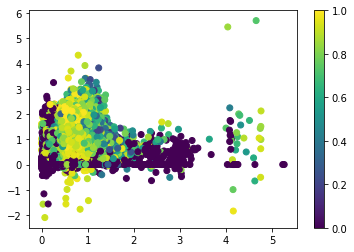

In [6]:
plt.scatter(marco.getCol('photo_z'),marco.getCol('M_Uj')-marco.getCol('M_V'),c=marco.getCol('ssr'))
plt.colorbar()
plt.show()

In [18]:
len(marco)

91218

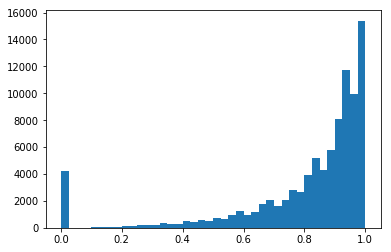

In [55]:
plt.hist(marco.getCol('ssr'),bins=40)
plt.show()

In [7]:
data_ = Table('../../SSR_photoz.fits') # more galaxies (photometric sample)

In [8]:
data = Table('../../SSR_zspec.fits') # same galaxies as the paper (spectroscopic sample)

In [9]:
data_.getColNames()

array(['id_IAU_1', 'num_1', 'alpha_1', 'delta_1', 'selmag_1',
       'errselmag_1', 'pointing', 'quadrant', 'zspec', 'zflg_1', 'norm',
       'epoch', 'photoMask_1', 'tsr', 'ssr', 'classFlag_1', 'id_IAU_2',
       'num_2', 'id_T07', 'alpha_2', 'delta_2', 'selmag_2', 'errselmag_2',
       'u', 'g', 'r', 'i', 'z', 'erru', 'errg', 'errr', 'erri', 'errz',
       'u_T07', 'g_T07', 'r_T07', 'i_T07', 'iy_T07', 'z_T07', 'erru_T07',
       'errg_T07', 'errr_T07', 'erri_T07', 'erriy_T07', 'errz_T07',
       'K_video', 'Ks', 'FUV', 'NUV', 'errK_video', 'errKs', 'errFUV',
       'errNUV', 'DeltaUG', 'DeltaGR', 'DeltaRI', 'ebv', 'r2', 'r2_T07',
       'classFlag_2', 'photoMask_2', 'spectroMask', 'num_str', 'zflg_2',
       'selmag', 'photo_z', 'M_Uj', 'M_B', 'M_V', 'M_I',
       'log_stellar_mass'], dtype='|S16')

In [10]:
data.getColNames()

array(['num_str_1', 'num_1', 'photo_z', 'id_IAU_1', 'num_1_1', 'alpha_1',
       'delta_1', 'selmag_1', 'errselmag_1', 'pointing_1', 'quadrant',
       'zspec', 'zflg_1', 'norm_1', 'epoch', 'photoMask_1', 'tsr', 'ssr',
       'classFlag_1', 'id_IAU_2', 'num_2', 'id_T07', 'alpha_2', 'delta_2',
       'selmag_2', 'errselmag_2', 'u', 'g', 'r', 'i', 'z_1a', 'erru',
       'errg', 'errr', 'erri', 'errz', 'u_T07', 'g_T07', 'r_T07', 'i_T07',
       'iy_T07', 'z_T07', 'erru_T07', 'errg_T07', 'errr_T07', 'erri_T07',
       'erriy_T07', 'errz_T07', 'K_video', 'Ks', 'FUV', 'NUV',
       'errK_video', 'errKs', 'errFUV', 'errNUV', 'DeltaUG', 'DeltaGR',
       'DeltaRI', 'ebv', 'r2', 'r2_T07', 'classFlag_2', 'photoMask_2',
       'spectroMask', 'num_1_2', 'num_str_2', 'pointing_2', 'zspec_1',
       'zflg_2', 'norm_2', 'selmag', 'mono_Name', 'OBJECT_1', 'Z_1',
       'TEMPL_1', 'SM_NORM_1', 'LG_T_NORM_1', 'CHI2_1', 'AGE_2', 'TAU_2',
       'OII_LUMINOSITY_1', 'HA_LUMINOSITY_1', 'DUST_LUMINOSITY_1',


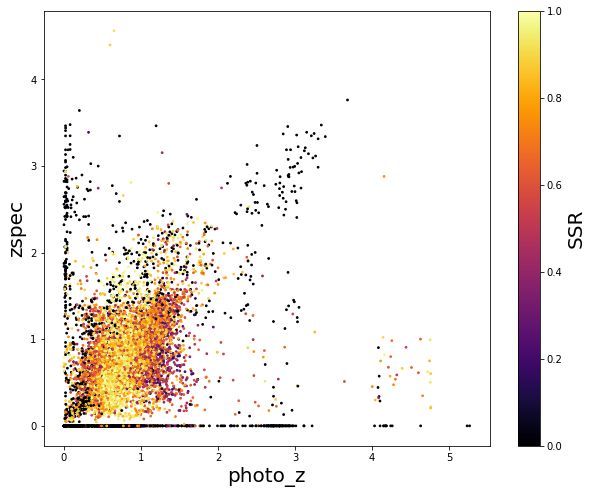

In [207]:
plt.figure(figsize=(10,8))
plt.scatter(data_.getCol('photo_z'),data_.getCol('zspec'),c=data_.getCol('ssr'),s=3,cmap='inferno')
plt.xlabel('photo_z')
plt.ylabel('zspec')
plt.colorbar(label='SSR')
#plt.savefig('../plots/019/zspec_photoz_SSR.png')
plt.show()

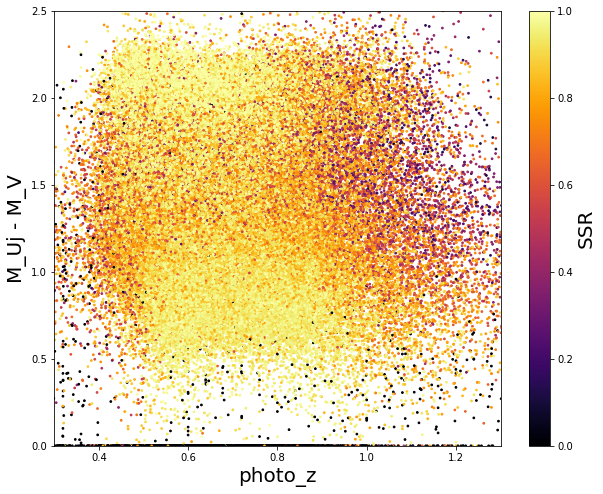

In [208]:
plt.figure(figsize=(10,8))
plt.scatter(data_.getCol('photo_z'),data_.getCol('M_Uj')-data_.getCol('M_V'),c=data_.getCol('ssr'),s=3,cmap='inferno')
plt.ylim(0,2.5)
plt.xlim(0.3,1.3)
plt.ylabel('M_Uj - M_V')
plt.xlabel('photo_z')
plt.colorbar(label='SSR')
#plt.savefig('../plots/019/photoz_UV_SSR.png')
plt.show()

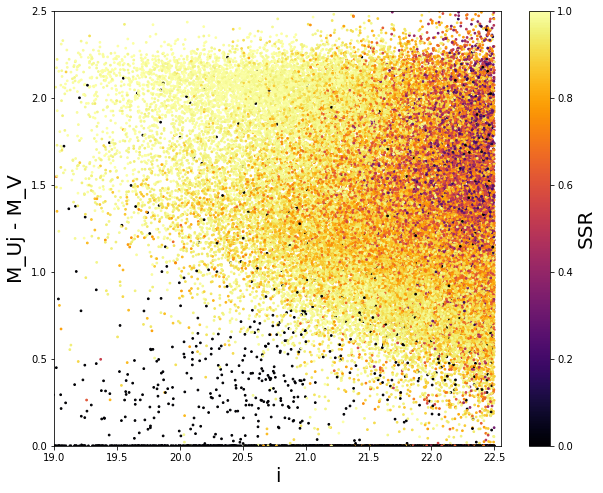

In [209]:
plt.figure(figsize=(10,8))
plt.scatter(data_.getCol('i'),data_.getCol('M_Uj')-data_.getCol('M_V'),c=data_.getCol('ssr'),s=3,cmap='inferno')
plt.ylim(0,2.5)
plt.xlim(19,22.55)
plt.ylabel('M_Uj - M_V')
plt.xlabel('i')
plt.colorbar(label='SSR')
plt.savefig('../plots/019/i_UV_SSR.png')
plt.show()

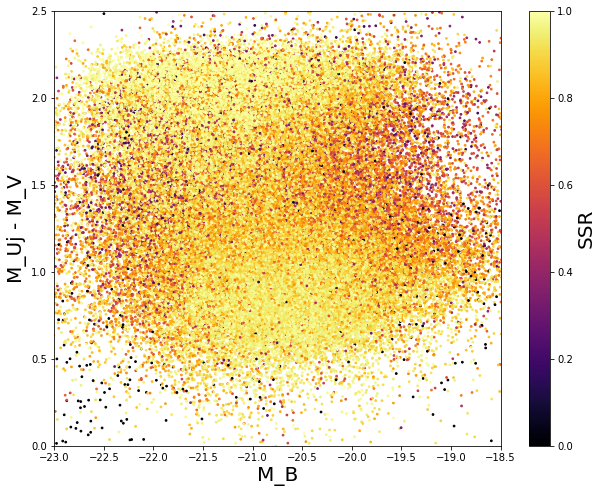

In [210]:
plt.figure(figsize=(10,8))
plt.scatter(data_.getCol('M_B'),data_.getCol('M_Uj')-data_.getCol('M_V'),c=data_.getCol('ssr'),s=3,cmap='inferno')
plt.ylim(0,2.5)
plt.xlim(-23,-18.5)
plt.ylabel('M_Uj - M_V')
plt.xlabel('M_B')
plt.colorbar(label='SSR')
#plt.savefig('../plots/019/B_UV_SSR.png')
plt.show()

/Users/giorgiomanzoni/pngs_anaconda/anaconda2/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in less
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/giorgiomanzoni/pngs_anaconda/anaconda2/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in less
  after removing the cwd from sys.path.


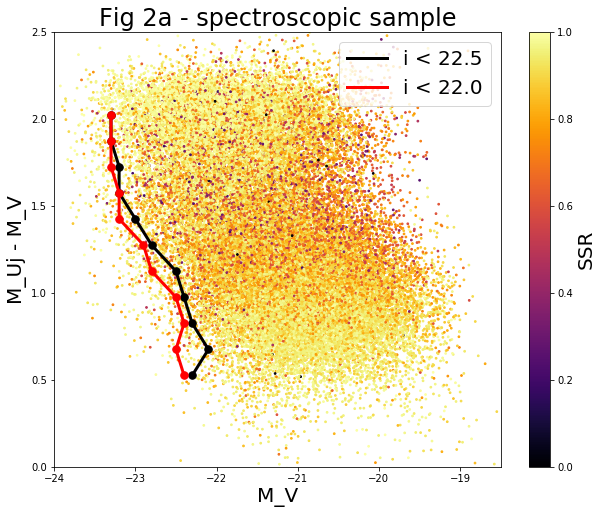

In [215]:
plt.figure(figsize=(10,8))
sel_z = np.where((data.getCol('photo_z')>0.5)&(data.getCol('photo_z')<1.1))
sel_i225 = np.where(data.getCol('i')<22.5)
sel_i220 = np.where(data.getCol('i')<22.)
sel_225 = np.intersect1d(sel_z,sel_i225)
sel_220 = np.intersect1d(sel_z,sel_i220)
plt.scatter(data.getCol('M_V')[sel_225],data.getCol('M_Uj')[sel_225]-data.getCol('M_V')[sel_225],c=data.getCol('ssr')[sel_225],s=3,cmap='inferno')
x,y = EDGE(data.getCol('M_V')[sel_225],
          data.getCol('M_Uj')[sel_225]-data.getCol('M_V')[sel_225])
x1,y1 = EDGE(data.getCol('M_V')[sel_220],
          data.getCol('M_Uj')[sel_220]-data.getCol('M_V')[sel_220])


plt.plot(x,y,lw=3,c='k',label='i < 22.5')
plt.plot(x,y,'.k',markersize=15)

plt.plot(x1,y1,lw=3,c='r',label='i < 22.0')
plt.plot(x1,y1,'.r',markersize=15)


plt.ylim(0,2.5)
plt.xlim(-24,-18.5)
plt.ylabel('M_Uj - M_V')
plt.xlabel('M_V')
plt.colorbar(label='SSR')
plt.legend(loc=1)
plt.title('Fig 2a - spectroscopic sample')
#plt.savefig('../plots/019/colmag_different_cut_all.png')
plt.show()

In [213]:
len(data),len(data_)

(73148, 90994)

In [212]:
# this is for the spectroscopic sample
# the numbers I have included in the referee report are for the photometric
deltas = x-x1
print(deltas)

[0.10000038 0.39999962 0.10000038 0.10000038 0.29999924 0.10000038
 0.20000076 0.         0.09999847 0.         0.        ]


In [70]:
len(sel[0])

75292

/Users/giorgiomanzoni/pngs_anaconda/anaconda2/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in less


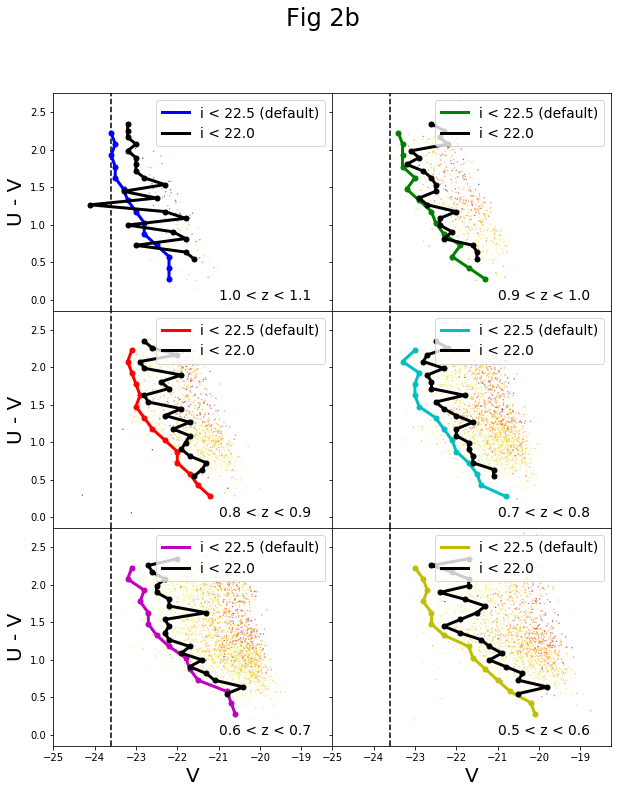

In [202]:
REDSHIFT_BINS=[0.5,0.6,0.7,0.8,0.9,1.0,1.1]
stylecolor = ['b','g','r','c','m','y','k']

k=0

U = data.getCol('M_Uj')
V = data.getCol('M_V')
UV = U - V
#Z = data.getCol('photo_z')
Z = data.getCol('zspec')

#cut_i = np.where(data.getCol('i')<22.)

fig =plt.figure(figsize=(10,12))
#fig.set_size_inches(10,18)
a=1
for zz in reversed(range(len(REDSHIFT_BINS)-1)):
    zlow = REDSHIFT_BINS[zz]
    zhigh = REDSHIFT_BINS[zz+1]
    
    zsel = np.where((Z>zlow)&(Z<zhigh))
    V_z = V[zsel]
    UV_z = UV[zsel]
    SSR_z = data.getCol('ssr')[zsel]
   
    i_z = data.getCol('i')[zsel]
    cut_i = np.where(i_z<22.5)   #fix this
    
    #V_z_ = V[zsel]
    #UV_z_ = UV[zsel]
    zsel_ = np.intersect1d(zsel,cut_i)
    
    #mass_z = mass[zsel]

    x_term,y_term = EDGE(V_z,UV_z,x_min=-25,x_max=-18,y_min=0.2,y_max=2.4)
    
    x_term1,y_term1 = EDGE(V_z[zsel_],UV_z[zsel_],x_min=-25,x_max=-18,y_min=0.5,y_max=2.4,y_bin_size=0.09)
    

    #SUBPLOT WITH 2 COLUMNS AND A ROW FOR EACH REDSHIFT BIN
    ax2 = plt.subplot(int(len(REDSHIFT_BINS)/2.),2,a)#,figsize=(10,12))

    #plt.axvline(x=-24.,linestyle='dashed',color="k")
    plt.axvline(x=-23.6,linestyle='dashed',color="k")

    #plt.plot(V_z,UV_z,".",c=stylecolor[k],markersize=0.1)#label=str(zlow)+" < z < "+str(zhigh)
    plt.scatter(V_z[zsel_],UV_z[zsel_],c=SSR_z[zsel_],s=0.1,cmap='inferno')#label=str(zlow)+" < z < "+str(zhigh)
    
    #left column
    if np.mod(a,2)==0:
        plt.setp(ax2.get_yticklabels(),visible=False)
    else:
        ax2.set_ylabel("U - V")
    #bottom row
    if a != len(REDSHIFT_BINS)-1 and a!= len(REDSHIFT_BINS)-2:
        plt.setp(ax2.get_xticklabels(),visible=False)
    else:
        ax2.set_xlabel("V")

    plt.text(-21.,0.0,str(zlow)+" < z < "+str(zhigh),fontsize='x-small')

    plt.plot(x_term,y_term,lw=3,label='i < 22.5 (default)',c=stylecolor[k])
    plt.plot(x_term,y_term,".",markersize=10,c=stylecolor[k])

    plt.plot(x_term1,y_term1,lw=3,label='i < 22.0',c='k')
    plt.plot(x_term1,y_term1,".",markersize=10,c='k')

    
    #ax2.axis([HISTO_MIN-1,HISTO_MAX+2,MIN_COLOR-0.65,MAX_COLOR+0.65])
    ax2.axis([-25,-18.255,-0.15,2.75])
    ax2.legend(markerscale=2,numpoints=1,fontsize="x-small",loc="upper right")


    if k<len(stylecolor)-1:k=k+1
    else: k=0

    a=a+1
    
plt.subplots_adjust(wspace=0,hspace=0)
#plt.colorbar()
#plt.savefig("../plots/011/COLMAG_6BINS_1011.PNG")
plt.suptitle('Fig 2b')
plt.savefig('../plots/019/colmag_different_cut_zbins.png')
plt.show()

/Users/giorgiomanzoni/pngs_anaconda/anaconda2/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in less
/Users/giorgiomanzoni/pngs_anaconda/anaconda2/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in less


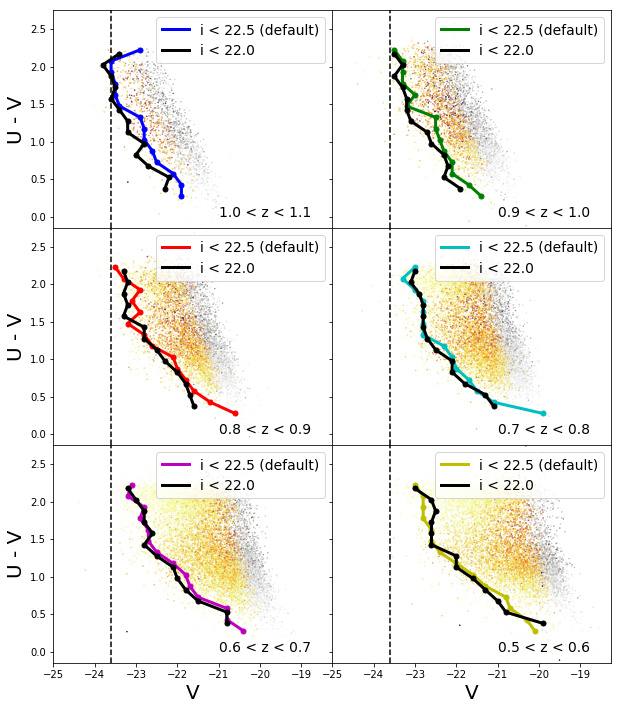

In [16]:
#delete the above cell if this works
REDSHIFT_BINS=[0.5,0.6,0.7,0.8,0.9,1.0,1.1]
stylecolor = ['b','g','r','c','m','y','k']

k=0

U = data.getCol('M_Uj')
V = data.getCol('M_V')
UV = U - V
#Z = data.getCol('photo_z')
Z = data.getCol('zspec')
i = data.getCol('i')
SSR = data.getCol('ssr')#[zsel_225]
    
    
    
#cut_i = np.where(data.getCol('i')<22.)

fig =plt.figure(figsize=(10,12))
#fig.set_size_inches(10,18)
a=1
for zz in reversed(range(len(REDSHIFT_BINS)-1)):
    zlow = REDSHIFT_BINS[zz]
    zhigh = REDSHIFT_BINS[zz+1]
    
    zsel_220 = np.where((Z>zlow)&(Z<zhigh)&(i<22.0))
    zsel_225 = np.where((Z>zlow)&(Z<zhigh)&(i<22.5))
    #V_z = V[zsel_225]
    #UV_z = UV[zsel_225]

   
    #i_z = data.getCol('i')[zsel]
    #cut_i = np.where(i_z<22.5)   #fix this
    
    #V_z_ = V[zsel]
    #UV_z_ = UV[zsel]
    #zsel_ = np.intersect1d(zsel,cut_i)
    
    #mass_z = mass[zsel]

    x_term,y_term = EDGE(V[zsel_225],UV[zsel_225],x_min=-25,x_max=-18,y_min=0.2,y_max=2.4)
    
    #x_term1,y_term1 = EDGE(V[zsel_220],UV[zsel_220],x_min=-25,x_max=-18,y_min=0.5,y_max=2.4,y_bin_size=0.09)
    x_term1,y_term1 = EDGE(V[zsel_220],UV[zsel_220],x_min=-25,x_max=-18,y_min=0.3,y_max=2.3)
    

    #SUBPLOT WITH 2 COLUMNS AND A ROW FOR EACH REDSHIFT BIN
    ax2 = plt.subplot(int(len(REDSHIFT_BINS)/2.),2,a)#,figsize=(10,12))

    #plt.axvline(x=-24.,linestyle='dashed',color="k")
    plt.axvline(x=-23.6,linestyle='dashed',color="k")

    #plt.plot(V_z,UV_z,".",c=stylecolor[k],markersize=0.1)#label=str(zlow)+" < z < "+str(zhigh)
    plt.scatter(V[zsel_225],UV[zsel_225],c=SSR[zsel_225],s=0.1,cmap='gist_gray')#label=str(zlow)+" < z < "+str(zhigh)
    plt.scatter(V[zsel_220],UV[zsel_220],c=SSR[zsel_220],s=0.1,cmap='inferno')#label=str(zlow)+" < z < "+str(zhigh)
    
    #left column
    if np.mod(a,2)==0:
        plt.setp(ax2.get_yticklabels(),visible=False)
    else:
        ax2.set_ylabel("U - V")
    #bottom row
    if a != len(REDSHIFT_BINS)-1 and a!= len(REDSHIFT_BINS)-2:
        plt.setp(ax2.get_xticklabels(),visible=False)
    else:
        ax2.set_xlabel("V")

    plt.text(-21.,0.0,str(zlow)+" < z < "+str(zhigh),fontsize='x-small')

    plt.plot(x_term,y_term,lw=3,label='i < 22.5 (default)',c=stylecolor[k])
    plt.plot(x_term,y_term,".",markersize=10,c=stylecolor[k])

    plt.plot(x_term1,y_term1,lw=3,label='i < 22.0',c='k')
    plt.plot(x_term1,y_term1,".",markersize=10,c='k')

    
    #ax2.axis([HISTO_MIN-1,HISTO_MAX+2,MIN_COLOR-0.65,MAX_COLOR+0.65])
    ax2.axis([-25,-18.255,-0.15,2.75])
    ax2.legend(markerscale=2,numpoints=1,fontsize="x-small",loc="upper right")


    if k<len(stylecolor)-1:k=k+1
    else: k=0

    a=a+1
    
plt.subplots_adjust(wspace=0,hspace=0)
#plt.colorbar()

#plt.suptitle('Fig 2b - spectroscopic sample')

plt.savefig('../plots/019/colmag_different_cut_zbins_notitle.png')
plt.show()

In [131]:
len(V_z)

15282

In [156]:
# it's not exactly the same plot of the paper because I am starting from the photometric sample

/Users/giorgiomanzoni/pngs_anaconda/anaconda2/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in less
  This is separate from the ipykernel package so we can avoid doing imports until


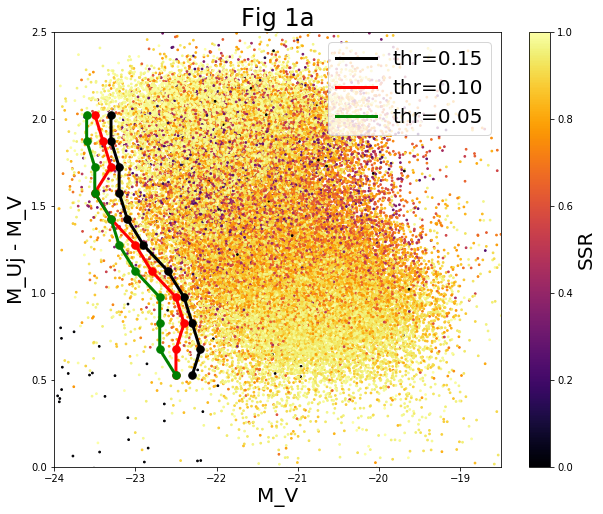

In [177]:
plt.figure(figsize=(10,8))
sel_z = np.where((data.getCol('photo_z')>0.5)&(data.getCol('photo_z')<1.1))
sel_i225 = np.where(data.getCol('i')<22.5)
#sel_i220 = np.where(data.getCol('i')<22.)
sel_225 = np.intersect1d(sel_z,sel_i225)
#sel_220 = np.intersect1d(sel_z,sel_i220)
plt.scatter(data.getCol('M_V')[sel_225],data.getCol('M_Uj')[sel_225]-data.getCol('M_V')[sel_225],c=data.getCol('ssr')[sel_225],s=3,cmap='inferno')

x,y = EDGE(data.getCol('M_V')[sel_225],data.getCol('M_Uj')[sel_225]-data.getCol('M_V')[sel_225],threashold=0.15)
x1,y1 = EDGE(data.getCol('M_V')[sel_225],data.getCol('M_Uj')[sel_225]-data.getCol('M_V')[sel_225],threashold=0.10)
x2,y2= EDGE(data.getCol('M_V')[sel_225],data.getCol('M_Uj')[sel_225]-data.getCol('M_V')[sel_225],threashold=0.05)


plt.plot(x,y,lw=3,c='k',label='thr=0.15')
plt.plot(x,y,'.k',markersize=15)

plt.plot(x1,y1,lw=3,c='r',label='thr=0.10')
plt.plot(x1,y1,'.r',markersize=15)

plt.plot(x2,y2,lw=3,c='g',label='thr=0.05')
plt.plot(x2,y2,'.g',markersize=15)


plt.ylim(0,2.5)
plt.xlim(-24,-18.5)
plt.ylabel('M_Uj - M_V')
plt.xlabel('M_V')
plt.colorbar(label='SSR')
plt.legend(loc=1)
plt.title('Fig 1a')
plt.savefig('../plots/019/colmag_different_thr_all.png')
plt.show()

/Users/giorgiomanzoni/pngs_anaconda/anaconda2/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in less


(2802, 71)
(6551, 481)
(10273, 880)
(14579, 1928)
(17092, 2534)
(13512, 1759)


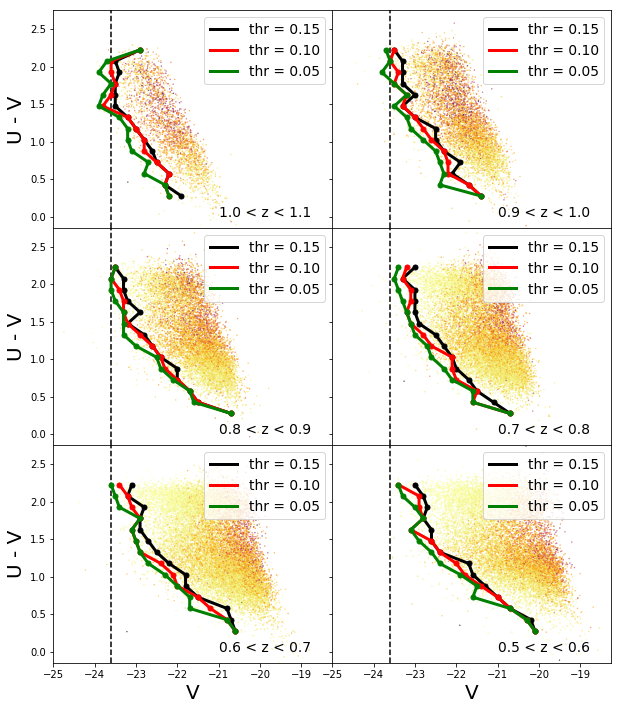

In [14]:
REDSHIFT_BINS=[0.5,0.6,0.7,0.8,0.9,1.0,1.1]
stylecolor = ['b','g','r','c','m','y','k']

k=0

U = data.getCol('M_Uj')
V = data.getCol('M_V')
UV = U - V
#Z = data.getCol('photo_z')
Z = data.getCol('zspec')

#cut_i = np.where(data.getCol('i')<22.)

fig =plt.figure(figsize=(10,12))
#fig.set_size_inches(10,18)
a=1
for zz in reversed(range(len(REDSHIFT_BINS)-1)):
    zlow = REDSHIFT_BINS[zz]
    zhigh = REDSHIFT_BINS[zz+1]
    
    zsel = np.where((Z>zlow)&(Z<zhigh))
    V_z = V[zsel]
    UV_z = UV[zsel]
    SSR_z = data.getCol('ssr')[zsel]
   
    i_z = data.getCol('i')[zsel]
    cut_i = np.where(i_z<22.5)
    
    #V_z_ = V[zsel]
    #UV_z_ = UV[zsel]
    zsel_ = np.intersect1d(zsel,cut_i)
    
    print(len(zsel[0]),len(zsel_))
    
    #mass_z = mass[zsel]

    x_term,y_term = EDGE(V_z,UV_z,x_min=-25,x_max=-18,y_min=0.2,y_max=2.4,threashold=0.15)
    x_term1,y_term1 = EDGE(V_z,UV_z,x_min=-25,x_max=-18,y_min=0.2,y_max=2.4,threashold=0.10)
    x_term2,y_term2 = EDGE(V_z,UV_z,x_min=-25,x_max=-18,y_min=0.2,y_max=2.4,threashold=0.05)
    
    #x_term1,y_term1 = EDGE(V_z[zsel_],UV_z[zsel_],x_min=-25,x_max=-18,y_min=0.5,y_max=2.4,y_bin_size=0.09)
    

    #SUBPLOT WITH 2 COLUMNS AND A ROW FOR EACH REDSHIFT BIN
    ax2 = plt.subplot(int(len(REDSHIFT_BINS)/2.),2,a)#,figsize=(10,12))

    #plt.axvline(x=-24.,linestyle='dashed',color="k")
    plt.axvline(x=-23.6,linestyle='dashed',color="k")

    #plt.plot(V_z,UV_z,".",c=stylecolor[k],markersize=0.1)#label=str(zlow)+" < z < "+str(zhigh)
    plt.scatter(V_z,UV_z,c=SSR_z,s=0.1,cmap='inferno')#label=str(zlow)+" < z < "+str(zhigh)
    
    #left column
    if np.mod(a,2)==0:
        plt.setp(ax2.get_yticklabels(),visible=False)
    else:
        ax2.set_ylabel("U - V")
    #bottom row
    if a != len(REDSHIFT_BINS)-1 and a!= len(REDSHIFT_BINS)-2:
        plt.setp(ax2.get_xticklabels(),visible=False)
    else:
        ax2.set_xlabel("V")


    #plt.plot(x_term,y_term,lw=3,label=str(zlow)+" < z < "+str(zhigh),c='k')
    plt.plot(x_term,y_term,lw=3,label='thr = 0.15',c='k')    
    plt.plot(x_term,y_term,".",markersize=10,c='k')
    plt.text(-21.,0.0,str(zlow)+" < z < "+str(zhigh),fontsize='x-small')
    
    #plt.plot(x_term1,y_term1,lw=3,label=str(zlow)+" < z < "+str(zhigh),c='r')
    plt.plot(x_term1,y_term1,lw=3,label='thr = 0.10',c='r')
    plt.plot(x_term1,y_term1,".",markersize=10,c='r',ls='--')


    #plt.plot(x_term2,y_term1,lw=3,label=str(zlow)+" < z < "+str(zhigh),c='g')
    plt.plot(x_term2,y_term1,lw=3,label='thr = 0.05',c='g')
    plt.plot(x_term2,y_term1,".",markersize=10,c='g',ls=':')

    
    #ax2.axis([HISTO_MIN-1,HISTO_MAX+2,MIN_COLOR-0.65,MAX_COLOR+0.65])
    ax2.axis([-25,-18.255,-0.15,2.75])
    ax2.legend(markerscale=2,numpoints=1,fontsize="x-small",loc="upper right")


    if k<len(stylecolor)-1:k=k+1
    else: k=0

    a=a+1
    
plt.subplots_adjust(wspace=0,hspace=0)
#plt.colorbar()


#plt.suptitle('Fig 1b - spectroscopic sample')


plt.savefig('../plots/019/colmag_different_thr_zbins_no_title.png')
plt.show()